In [618]:
import os
import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()

In [619]:
loan_sanction_train = pd.read_csv('loan_sanction_train.csv', 
                         skiprows=1,
                         names=['Loan_ID',
                                'Gender',
                                'Married',
                                'Dependents',
                                'Education',
                                'Self_Employed',
                                'ApplicantIncome',
                                'CoapplicantIncome',
                                'LoanAmount',
                                'Loan_Amount_Term',
                                'Credit_History',
                                'Property_Area',
                                'Loan_Status'])

loan_sanction_train = loan_sanction_train.sample(frac=1).reset_index(drop=True)

In [620]:
loan_sanction_train.head().T
df = loan_sanction_train

df = df.drop(df.columns[0], axis=1)

In [621]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Replace the column names as per your actual DataFrame
df['Gender'] = np.where(df['Gender'] == 'Male', 0, 1)
df['Married'] = np.where(df['Married'] == 'Yes', 0, 1)
df['Education'] = np.where(df['Education'] == 'Graduate', 0, 1)
df['Self_Employed'] = np.where(df['Self_Employed'] == 'Yes', 0, 1)

# Using map for Dependents and Property_Area
dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
property_area_mapping = {'Urban': 0, 'Rural': 1, 'Semiurban': 2}

df['Dependents'] = df['Dependents'].map(dependents_mapping)
df['Property_Area'] = df['Property_Area'].map(property_area_mapping)

# For Loan_Status
loan_status_mapping = {'Y': 0, 'N': 1}
df['Loan_Status'] = df['Loan_Status'].map(loan_status_mapping)


# Print the updated DataFrame
print(df)

df = df.dropna(subset=df.columns.values)




     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0         3.0          0              1             4691   
1         0        0         1.0          0              1             3333   
2         1        0         0.0          0              1             2484   
3         0        0         0.0          0              1             9323   
4         1        1         0.0          0              0             7441   
..      ...      ...         ...        ...            ...              ...   
608       1        0         0.0          0              1             2473   
609       0        1         0.0          0              1            12876   
610       1        0         3.0          0              1            23803   
611       0        0         3.0          0              1            81000   
612       0        0         0.0          0              0             5818   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [622]:
df.shape

(517, 12)

In [623]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,517.0,0.203095,0.402692,0.0,0.0,0.0,0.0,1.0
Married,517.0,0.355899,0.479249,0.0,0.0,0.0,1.0,1.0
Dependents,517.0,0.781431,1.025169,0.0,0.0,0.0,2.0,3.0
Education,517.0,0.201161,0.401256,0.0,0.0,0.0,0.0,1.0
Self_Employed,517.0,0.866538,0.340403,0.0,1.0,1.0,1.0,1.0
ApplicantIncome,517.0,5541.632495,6472.488133,150.0,2895.0,3833.0,5821.0,81000.0
CoapplicantIncome,517.0,1555.657485,2546.176498,0.0,0.0,1126.0,2250.0,33837.0
LoanAmount,517.0,146.145068,84.920461,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,517.0,341.825919,64.611485,36.0,360.0,360.0,360.0,480.0
Credit_History,517.0,0.856867,0.350548,0.0,1.0,1.0,1.0,1.0


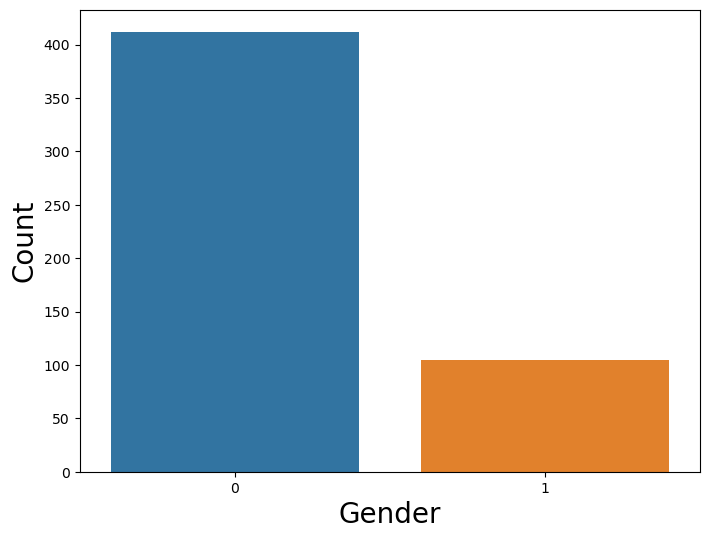

In [624]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Gender', data=df)

plt.xlabel('Gender', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.show()

# implique les mec request des loan plus eleve

In [625]:
class_att = {'Y':0, 'N':1}

df['Loan_Status'].replace(class_att, inplace=True)

df[['Loan_Status']].sample(10)

,Loan_Status
306,1
545,0
157,1
120,0
588,0
604,1
305,0
581,0
568,0
151,0


In [626]:
features = df.drop('Loan_Status', axis=1)

target = df[['Loan_Status']]

In [627]:
standardScaler = StandardScaler()

scaled_features = pd.DataFrame(standardScaler.fit_transform(features), 
                               columns=features.columns,
                               index=features.index)

scaled_features.describe().T



,count,mean,std,min,25%,50%,75%,max
Gender,517.0,-1.374357e-17,1.000969,-0.504831,-0.504831,-0.504831,-0.504831,1.980861
Married,517.0,9.792296e-17,1.000969,-0.743339,-0.743339,-0.743339,1.345282,1.345282
Dependents,517.0,-5.497429e-17,1.000969,-0.762984,-0.762984,-0.762984,1.189802,2.166195
Education,517.0,1.717947e-17,1.000969,-0.501813,-0.501813,-0.501813,-0.501813,1.992775
Self_Employed,517.0,-4.810251e-17,1.000969,-2.548088,0.392451,0.392451,0.392451,0.392451
ApplicantIncome,517.0,6.871787e-18,1.000969,-0.833814,-0.409301,-0.264240,0.043204,11.669616
CoapplicantIncome,517.0,0.000000e+00,1.000969,-0.611570,-0.611570,-0.168910,0.272964,12.690639
LoanAmount,517.0,-1.271281e-16,1.000969,-1.616547,-0.543918,-0.213878,0.257607,6.528360
Loan_Amount_Term,517.0,2.576920e-17,1.000969,-4.737890,0.281555,0.281555,0.281555,2.140609
Credit_History,517.0,-1.803844e-17,1.000969,-2.446730,0.408709,0.408709,0.408709,0.408709


In [628]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_features, 
                                                    target, 
                                                    test_size=0.2,
                                                    random_state=10)



In [629]:
scaled_features.shape

(517, 11)

In [630]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.2,
                                                  random_state=10)

In [631]:
x_train.shape, x_test.shape

((330, 11), (104, 11))

In [632]:
def build_and_compile_model():
    
    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    x = layers.Dense(32, activation='relu')(inputs)

    x = layers.Dropout(0.3)(x)

    x = layers.Dense(16, activation='relu')(x)

    predictions = layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    
    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(0.5),
                       tf.keras.metrics.Recall(0.5)])
    return model


In [633]:
model = build_and_compile_model()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [634]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 11), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [635]:
num_epochs = 20

In [636]:
model.fit(x_train, y_train, epochs=num_epochs)

Epoch 1/20
11/11 [==============================] - 0s 977us/step - loss: 0.6221 - accuracy: 0.6727 - precision: 0.4750 - recall: 0.1792
Epoch 2/20
11/11 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.7121 - precision: 0.6170 - recall: 0.2736
Epoch 3/20
11/11 [==============================] - 0s 709us/step - loss: 0.6054 - accuracy: 0.6879 - precision: 0.5429 - recall: 0.1792  
Epoch 4/20
11/11 [==============================] - 0s 668us/step - loss: 0.5808 - accuracy: 0.7242 - precision: 0.6923 - recall: 0.2547
Epoch 5/20
11/11 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.7121 - precision: 0.6571 - recall: 0.2170
Epoch 6/20
11/11 [==============================] - 0s 790us/step - loss: 0.5526 - accuracy: 0.7394 - precision: 0.7632 - recall: 0.2736
Epoch 7/20
11/11 [==============================] - 0s 686us/step - loss: 0.5397 - accuracy: 0.7667 - precision: 0.8718 - recall: 0.3208
Epoch 8/20
11/11 [=========================

In [637]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [638]:
model = build_and_compile_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                384       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
21/21 [==============================] - 0s 6ms/step - loss: 0.7204 - accuracy: 0.4727 - precision_1: 0.2733 - recall_1: 0.3868 - val_loss: 0.6425 - val_accuracy: 0.6506 - val_precision_1: 0.2500 - val_recall_1: 0.2632
Epoch 2/20
21/21 [==============================] - 0s 940us/step - loss: 0.6822 - accuracy: 0.6212 - precision_1: 0.3908 - recall_1: 0.3208 - val_loss: 0.6106 - val_accuracy: 0.7711 - val_precision_1: 0.5000 - val_recall_1: 0.1579
Epoch 3/20
21/21 [==============================] - 0s 946us/step - loss: 0.6516 - accuracy: 0.6606 - precision_1: 0.4500 - recall_1: 0.2547 - val_loss: 0.5857 - val_accuracy: 0.7831 - val_precision_1: 0.6667 - val_recall_1: 0.1053
Epoch 4/20
21/21 [==============================] - 0s 795us/step - loss: 0.6398 - accuracy: 0.6727 - precision_1: 0.4762 - recall_1: 0.1887 - val_loss: 0.5665 - val_accuracy: 0.7711 - val_precision_1: 0.5000 - val_recall_1: 0.0526
Epoch 5/20
21/21 [==============================] - 0s 1ms/step - loss: 0.